# Cyfrowe Przetwarzanie Sygnałów

**Laboratorium nr 5 Projektowanie filtrów analogowych**

prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat 

rozwiązania: Jacek Budny

Układy analogowe LTI można analizować i projektować przy użyciu ich transmitancji $H(s)$ i związanej z nią
charakterystyki częstotliwościowej $H(jω)$ ($s$ to zespolona zmienna transformacji Laplace'a, która dla $s=jω$
przechodzi w transformację Fouriera):  
\begin{align}
H(s)&=H(jω), \\ s&=jω \\  
H(jω)&=\frac{Y(jω)}{X(jω)}=\frac{\sum_{m=0}^M b_{m}(jω)^m}{\sum_{n=0}^N a_{n}(jω)^n}=\frac{b_{M}\prod_{m=1}^M (jω-z_{m})}{a_{N}\prod_{n=1}^N (jω-p_{n})} \text{ (1)}
\end{align}     
$Y(jω)$ i $X(jω)$ są wielomianami zmiennej $jω$, związanymi z wyjściem i wejściem układu. Odpowiedni dobór
współczynników $b_m$ i $a_n$ obu wielomianów zapewnia wymaganą charakterystykę częstotliwościową
projektowanego układu. Wielomiany w liczniku i mianowniku można również zapisać za pomocą ich miejsc
zerowych $z_m$ i $p_n$.  
Miejsca zerowe $z_m$ licznika transmitancji (zespolone, parami sprzężone) powodują wyzerowanie odpowiedzi
częstotliwościowej dla wybranych częstotliwości $(jω=z_m)$, czyli usunięcie tych częstotliwości przez układ (brak
ich na wyjściu). Natomiast w pobliżu tych pulsacji sygnał wejściowy jest na wyjściu mocno tłumiony. Miejsca
te nazywamy ,,zerami transmitancji''.  
Miejsca zerowe $p_n$ mianownika transmitancji (również zespolone, parami sprzężone) powodują silne
wzmocnienie wybranych częstotliwości na wyjściu układu ($(jω-p_n)$ nie zeruje się, tylko przyjmuje małą wartość;
z tego powodu dla danej częstotliwości dzielimy przez „mało” i mamy duże wzmocnienie). Miejsca te
nazywamy ,,biegunami transmitancji''.



##**1. Projektowanie metodą zer i biegunów (1 pkt)**

Wykorzystując (1) możemy zaprojektować charakterystykę filtru pasywnego (układu LTI) rozmieszczając

odpowiednio zera i bieguny transmitancji na płaszczyźnie zespolonej. Przykładowo, dla filtra pasmowo-
przepustowego, przenoszącego sygnał w okolicach pulsacji równej 10 rad/s możemy
zaprojektować ,,ręcznie'' jego transmitancję tak, aby zera oraz bieguny przyjęły następujące wartości:
\begin{align}
p_{1,2}&=-0.5±j\ 9.5;\; p_{3,4}=-1±j\ 10; \; p_{5,6}=-0.5±j\ 10.5 \\
z_{1,2}&=±\ j\ 5;\; z_{3,4}=± \ j\ 15
\end{align}
Zapisz transmitancję (1) wykorzystując powyższe parametry.

Przedstaw zera i bieguny na płaszczyźnie zespolonej (zera zaznacz znakiem ,,o'', bieguny znakiem ,,*'').

Narysuj charakterystykę amplitudowo-częstotliwościową układu opisanego powyższymi parametrami w skali
liniowej: $|H(jω)|$ oraz decybelowej: $20log_{10}|H(jω)|$. Użyj funkcji **poly1d** z biblioteki **numpy**.

Czy filtr ten jest pasmowo-przepustowy? Jakie jest maksymalne i minimalne tłumienie w paśmie zaporowym?
Czy wzmocnienie układu w paśmie przepustowym jest równe 1? Jeśli nie, to zmodyfikuj odpowiednio
transmitancję układu.

Narysuj charakterystykę fazowo-częstotliwościową. Czy jest ona zgodna z naszymi oczekiwaniami? Czyli
liniowa w paśmie przepustowym, co gwarantuje, że układ nie zmienia na wyjściu kształtu sygnału zawartego
w paśmie przepustowym.


In [ ]:
import numpy as np


##**2. Filtr Butterworth LP (1 pkt)**

Poniżej przedstawiono metodę projektowania filtrów Butterwortha LP (dolnoprzepustowych).

Filtr LP Butterwortha składa się wyłącznie z biegunów rozmieszczonych na lewej półpłaszczyźnie zespolonej
na okręgu o promieniu równym pulsacji granicznej $ω_{3dB}$. Jest to pulsacja, dla której zmienia się charakter
filtru z przepustowego na zaporowy. Przykład rozmieszczenia biegunów transmitancji dla filtru rzędu 4
przedstawiono na poniższym rysunku.

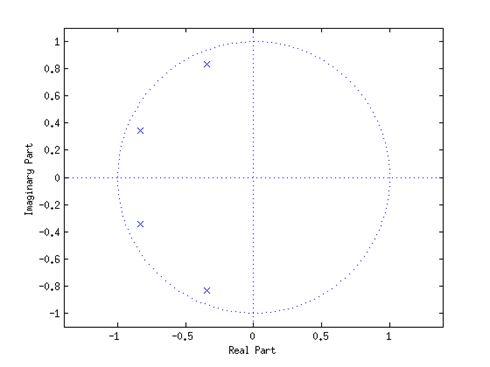

Położenie biegunów można opisać w następujący sposób:
\begin{align}
p_{k}=ω_{3dB}\exp[\ j\ (\frac{π}{2} + \frac{1}{2} \frac{π}{N} + (k - 1 ) \frac{π}{N})], \ \ k = 1,2,3,...,N
\end{align}
gdzie N oznacza rząd filtru (liczbę biegunów).

Zaprojektuj filtry Butterwortha LP dla $N=2, 4, 6, 8$ i $ω_{3dB}=2π100 \ [rd/s]$.

Narysuj na jednym rysunku ich charakterystyki amplitudowe ($20log_{10}|H(jω)|$) w funkcji f), skalując oś f liniowo
(**plot()**) i logarytmicznie (**xscale("log")**). Narysuj charakterystyki fazowe (kąt $H(jω)$ w funkcji f), skalując oś f
liniowo. Funkcje znajdziesz w bibliotece **matplotlib.pyplot**.

Wyznacz i narysuj odpowiedź impulsową filtru $N=4$ oraz jego odpowiedź na skok jednostkowy. Do tego celu
użyj odpowiednio funkcji **impulse(H)** i **step(H)**, gdzie H to transmitancja dla układu ciągłego. Funkcje znajdziesz w bibliotece **scipy.signal**.

In [ ]:
#


##**3. Filtr antyaliasingowy (1 pkt)**

Przed przetwornikiem A/C należy umieścić filtr dolnoprzepustowy w celu jak najlepszego zabezpieczenia się
przed zjawiskiem „aliasingu” częstotliwościowego (po zbyt „wolnym” spróbkowaniu „szybkie” sygnały
wyglądają jak „wolne”). Filtr ten powinien maksymalnie tłumić częstotliwości $f > \frac{f_s}{2}$ (połowa częstotliwości
próbkowania) i mieć wzmocnienie=1 dla $f < \frac{f_s}{2}$ (tzn. najwierniej przenosić sygnały w tym paśmie). Zaprojektuj
taki filtr dla następujących warunków:
* częstotliwość próbkowania przetwornika A/C wynosi $f_s=256 kHz$,
* typ filtru: Butterworth, Czebyszew 1, Czebyszew 2, eliptyczny (użyj funkcji z biblioteki **scipy.signal**, pamiętaj że ma
być to filtr analogowy a nie cyfrowy),
* filtr powinien być możliwie najmniejszego rzędu,
* zmiany tłumienia (zafalowania) w paśmie $f < f3dB=64 kHz$ nie większe niż 3 dB,
* tłumienie dla częstotliwości $\frac{f_s}{2}=128$ kHz ma wynosić co najmniej An=40 dB.
Narysuj rozkład biegunów oraz charakterystykę częstotliwościową zaprojektowanych transmitancji $H(s)$. Osie
wyskaluj w $[Hz]$. Zastosowanie, którego z filtrów jest najkorzystniejsze?

In [ ]:
#




##**4. Filtr separujący (2+0.25 pkt)**
Widmo kilku analogowych stacji radiowych FM przedstawiono na poniższym rysunku. Jak widać sygnał
pojedynczej stacji zajmuje w przybliżeniu pasmo 100 kHz. Sygnał ten moduluje w częstotliwości nośną stacji,
np. w Krakowie 96 MHz dla RMF FM: mamy wówczas 96 MHz ± 100 kHz.  
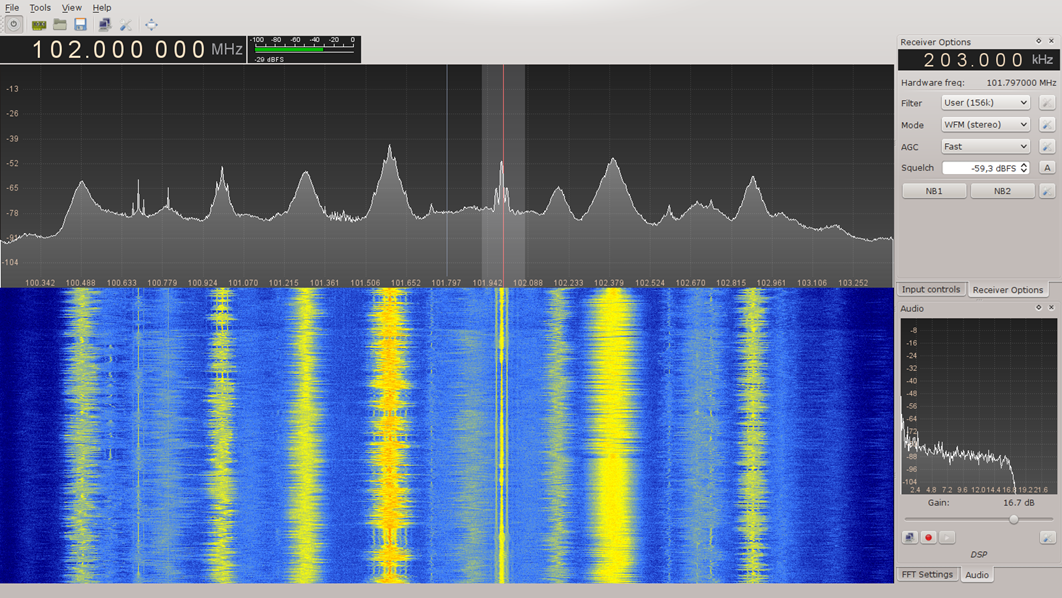  
*Widmo sygnału radiowego zawierającego kilka analogowych stacji FM*  
Wykorzystując funkcję z biblioteki **scipy.signal**, zaprojektuj pasmowo-przepustowy filtr analogowy do separacji stacji
radiowych.  
Najpierw zaprojektuj testowy filtr 96 MHz ±1 MHz następnie docelowy 96 MHz ±100 kHz. W obu
przypadkach zafalowania w paśmie przepustowym nie mogą być większe niż 3 dB a tłumienie w paśmie
zaporowym co najmniej równe 40 dB.
Wyświetl charakterystykę częstotliwościową zaprojektowanego filtru. Oś częstotliwości wyskaluj w Hz.
Zaznacz punkty charakterystyczne na wykresie (granice pasma zaporowego i przepustowego).  
Jeżeli charakterystyka filtru będzie niezadowalająca, spróbuj obniżyć wymagania co do tłumienia w paśmie
zaporowym oraz zwiększyć rząd filtru.  
(**opcjonalnie**, +0.25 pkt) Zamiast używać gotowych funkcji Matlaba, zaprojektuj prototyp LP „na piechotę”, a
następnie wykonaj transformację LP do BP.

In [ ]:
# +- 1MHz

# +- 100kHz



##**5. Implementacja sprzętowa filtru analogowego (+0.5 pkt)**
Zaprojektuj sprzętową implementacje wybranego filtru z ćwiczenia 3. Wykorzystaj wzmacniacze operacyjne,
rezystory, kondensatory. Podaj strukturę układu oraz wartości rezystancji i pojemności wszystkich
elementów pasywnych. Patrz rozdz. 6 w podręczniku [TZ].

In [ ]:
#


Przykładowy schemat:

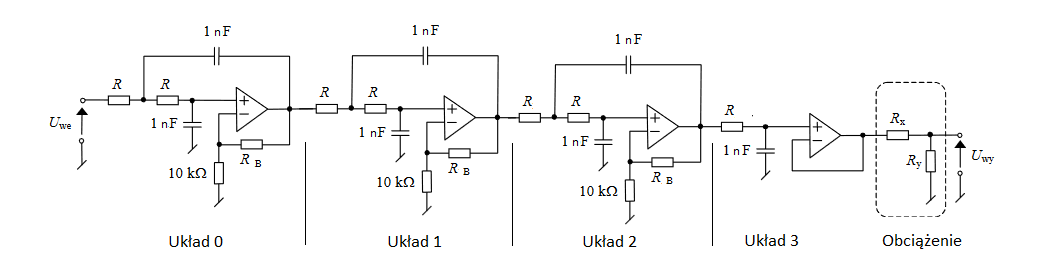

##**6. Weryfikacja filtru analogowego (+0.5 pkt)**
Dla filtru zaprojektowanego w ćwiczeniu 6 dopasuj wartości elementów pasywnych z typoszeregu
dostępnego w handlu (np. E24), wyznacz charakterystyki częstotliwościowe przed i po modyfikacji. Wyświetl
je na jednym wykresie. Czy zmiana charakterystyk mieści się w granicy 3 dB?

In [ ]:
#


##**7. Symulacja obwodu (+1 pkt)**
Przenieś projekt sprzętowej implementacji filtru do symulatora obwodów analogowych np. LTSpice
(http://www.linear.com/designtools/software/ - licencja freeware) w oparciu o [instrukcję użytkownika](https://www.analog.com/en/license/spice-models?mediaPath=media/en/simulation-models/spice-models/ltspicegettingstartedguide.pdf&modelType=spice-models), lub
inne opracowania znalezione w sieci. Wykonaj symulację i wyznacz wykresy częstotliwościowe. Porównaj
uzyskane wyniki z teoretycznymi obliczeniami.

Jako sygnału wejściowego użyj napięcia ze źródła AC (**Edit/Components/voltage**) o amplitudzie 10V,
składowej stałej (DC offset) 2V i częstotliwości 10 kHz. Przy implementowaniu filtru użyj elementu
uniwersalnego wzmacniacza operacyjnego (**Edit/Components/** i z katalogu **Opamps** wybrać **UniversalOamp2**)
i zasil go (wejścia „+” i „-” ) ze źródeł napięcia DC 15V, tak jak na schemacie poniżej.

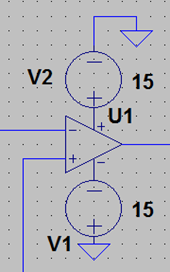

Wykonaj symulację i wyznacz wykresy częstotliwościowe za pomocą [analizy AC](https://www.youtube.com/watch?v=fziUQaVQxA4&ab_channel=LinearTechnology) (**Simulation/Edit Simulation Command/AC Analysis**).